#### [Chapter 2](https://github.com/Ziaeemehr/netsci/blob/main/examples/chap_02.ipynb)

#### **Graph Theory**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/examples/chap_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/netsci.git"

In [2]:
import netsci
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from netsci.plot import plot_graph
from netsci.analysis import find_sap, find_hamiltonian_path

In [3]:
np.random.seed(0)

Degrees: {0: 2, 1: 2, 2: 2, 3: 5, 4: 3, 5: 1, 6: 3, 7: 2}
Average degree: 2.5
Adjacency matrix:
 [[0 0 0 1 1 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 1 0 1 0 0 0 0]
 [1 0 1 0 0 1 1 1]
 [1 0 0 0 0 0 1 1]
 [0 0 0 1 0 0 0 0]
 [0 1 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]]
Edges: [(0, 3), (0, 4), (1, 2), (1, 6), (2, 3), (3, 5), (3, 6), (3, 7), (4, 6), (4, 7)]


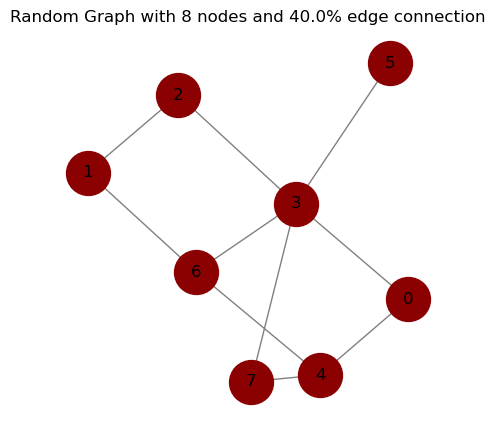

In [4]:
# make a random graph with n nodes and p% probability of edge connection
num_nodes = 8
probability = .4
seed = 2
graph = nx.gnp_random_graph(num_nodes, probability, seed=2, directed=False)

# degree distribution
degrees = dict(graph.degree())
print("Degrees:", degrees)

# calculate the average degree
average_degree = np.mean(list(degrees.values()))
print("Average degree:", average_degree)

# adjacency matrix
adjacency_matrix = nx.to_numpy_array(graph).astype(int)
print("Adjacency matrix:\n", adjacency_matrix)

# edges
edges = list(graph.edges())
print("Edges:", edges)

# plot the graph
# plt.figure(figsize=(5, 5))
# plt.axis('off')
plot_graph(graph, node_size=1000,
           node_color='darkred',
           edge_color='gray',
           figsize=(5, 5),
           title="Random Graph with {} nodes and {}% edge connection".format(num_nodes, probability*100))
plt.show()


In [5]:
# shortest path
source = np.random.randint(0, len(graph))
target = np.random.randint(0, len(graph))
shortest_path = nx.shortest_path(graph, source, target)
print("Shortest path from", source, "to", target, ":", shortest_path)

# diameter : maximal shortest path length
if nx.is_connected(graph):
    diameter = nx.diameter(graph)
    print("Diameter:", diameter)
    
# average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(graph)
print(f"Average shortest path length: {avg_shortest_path_length:.2f}")

# find self avoiding paths
np.random.seed(seed) # to fix the plot


Shortest path from 3 to 0 : [3, 0]
Diameter: 3
Average shortest path length: 1.82


Weighted adjacency matrix:
 [[0 9 4 9 9]
 [9 0 1 6 4]
 [4 1 0 0 6]
 [9 6 0 0 8]
 [9 4 6 8 0]]


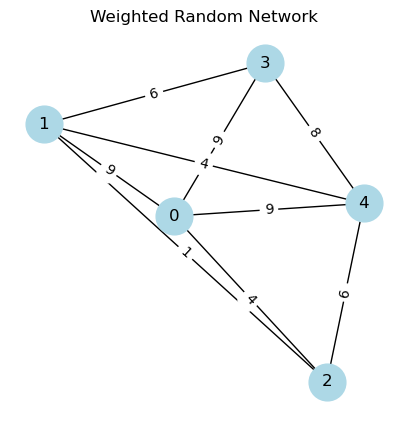

In [6]:
# weighted graph
seed = 3
np.random.seed(seed) # to fix the plot

num_nodes = 5
probability = 0.8
graph_w = nx.erdos_renyi_graph(num_nodes, probability, seed=seed)

for (u,v) in graph_w.edges():
    graph_w[u][v]['weight'] = np.random.randint(1, 10)

# plot the weighted graph
pos = nx.spring_layout(graph_w, seed=seed)
edge_labels = nx.get_edge_attributes(graph_w, 'weight')

plot_graph(graph_w, 
           with_labels=True, 
           node_color='lightblue', 
           node_size=700, 
           font_size=12,
           edge_labels=edge_labels, 
           figsize=(5, 5), 
           title="Weighted Random Network")

weighted_adjacency_matrix = nx.to_numpy_array(graph_w, weight='weight').astype(int)
print("Weighted adjacency matrix:\n", weighted_adjacency_matrix)

self avoiding path

A->B->E->F
A->C->F


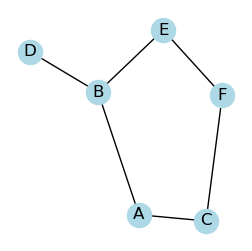

In [7]:
# Create a graph
G = nx.Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'F')]
G.add_edges_from(edges)

# Find all self-avoiding paths from 'A' to 'F'
start_node = 'A'
target_node = 'F'
all_saps = list(find_sap(G, start_node, target_node))

for path in all_saps:
    print("->".join(path))

plot_graph(G, seed=2, figsize=(3, 3))


A Hamiltonian path is a path in a graph that visits each vertex exactly once.

Hamiltonian Path found: (1, 2, 3, 4, 5, 6)


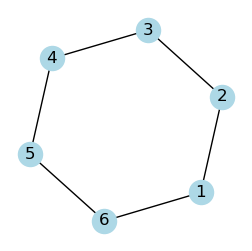

In [8]:
# Example usage
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)])

plot_graph(G, seed=2, figsize=(3, 3))

path = find_hamiltonian_path(G)
if path:
    print("Hamiltonian Path found:", path)
else:
    print("No Hamiltonian Path found")


In [9]:
# hamiltonian path of weighted graph:
path = find_hamiltonian_path(graph_w)
if path:
    print("Hamiltonian Path found:", path)
else:
    print("No Hamiltonian Path found")

Hamiltonian Path found: (0, 1, 2, 4, 3)
